<a href="https://colab.research.google.com/github/tamara-kostova/IIS/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
!pip install ndlib

# **Exercise 1**

Network Definition

In [170]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op

N = 1000
p = 0.1
g = nx.erdos_renyi_graph(N, p)

Model definition

In [171]:
models = {
    'SI': ep.SIModel(g),
    'SIS': ep.SISModel(g),
    'SEIS': ep.SEISModel(g),
    'SEIR': ep.SEIRModel(g)
}
for model_name, model_instance in models.items():
    print(f"Model: {model_name}")
    print(f"Parameters: {model_instance.parameters}")
    print(f"Available Statuses: {model_instance.available_statuses}")
    print("\n")

Model: SI
Parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': '[0,1]', 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: SIS
Parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0, 1], 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: SEIS
Parameters: {'model': {'alpha': {'descr': 'Incubation period', 'range': [0, 1], 'optional': False}, 'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0, 1], 'optional':

Set parameters

In [172]:
parameters = {
    'SI': {'beta': 0.001, 'fraction_infected': 0.05},
    'SIS': {'beta': 0.001, 'lambda': 0.01, 'fraction_infected': 0.05},
    'SEIS': {'beta': 0.001, 'lambda': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05},
    'SEIR': {'beta': 0.001, 'gamma': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05}
}

Simulations

In [173]:
import ndlib.models.ModelConfig as mc
import matplotlib
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend


image_names = []
for model_name, model in models.items():
    config = mc.Configuration()
    params = parameters[model_name]
    for param, value in params.items():
        config.add_model_parameter(param, value)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

SI simulation done.
SIS simulation done.
SEIS simulation done.
SEIR simulation done.


Visualizations

SI


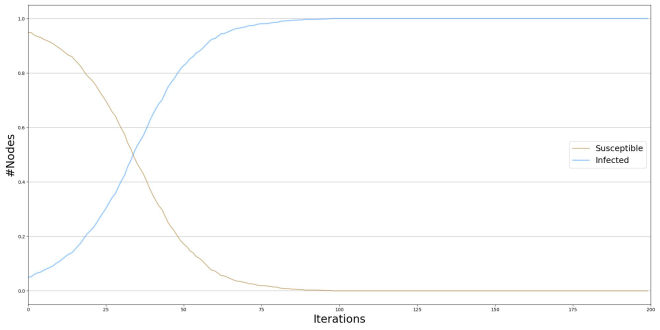

SIS


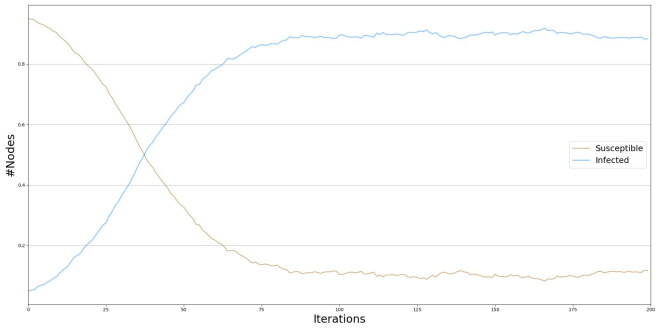

SEIS


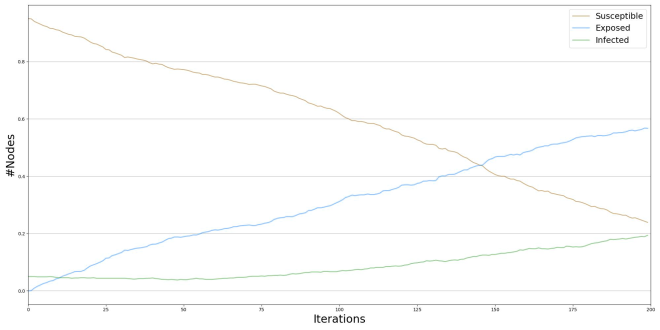

SEIR


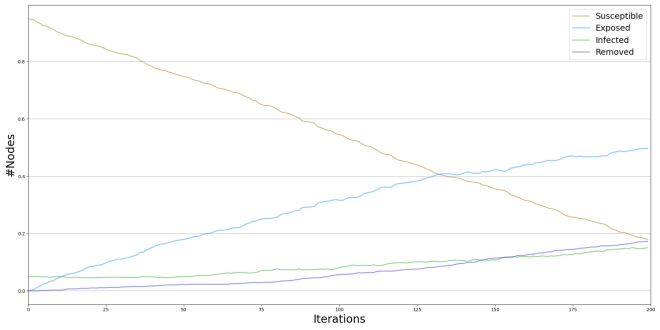

In [174]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)

# **Exercise 2**

Network definition

In [175]:
N = 1000
p = 0.1
g = nx.erdos_renyi_graph(N, p)

Model definition

In [176]:
models = {
    'Voter': op.VoterModel(g),
    'QVoter': op.QVoterModel(g),
    'MajorityRuleModel': op.MajorityRuleModel(g),
    'Sznajd': op.SznajdModel(g)
}
for model_name, model_instance in models.items():
    print(f"Model: {model_name}")
    print(f"Parameters: {model_instance.parameters}")
    print(f"Available Statuses: {model_instance.available_statuses}")
    print("\n")

Model: Voter
Parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: QVoter
Parameters: {'model': {'q': {'descr': 'Number of neighbours that affect the opinion of an agent', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: MajorityRuleModel
Parameters: {'model': {'q': {'descr': 'Number of randomly chosen voters', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: Sznajd
Parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}




Simulation

In [177]:
image_names=[]
for model_name, model in models.items():
    config = mc.Configuration()

    config.add_model_parameter('q', 4)

    model.set_initial_status(config)

    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

Voter simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')
/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


QVoter simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


MajorityRuleModel simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


Sznajd simulation done.


Visualizations

Voter


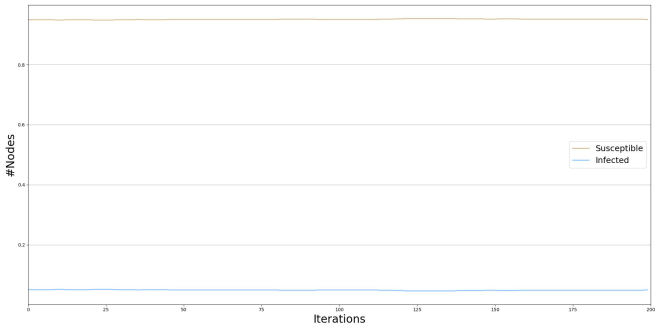

QVoter


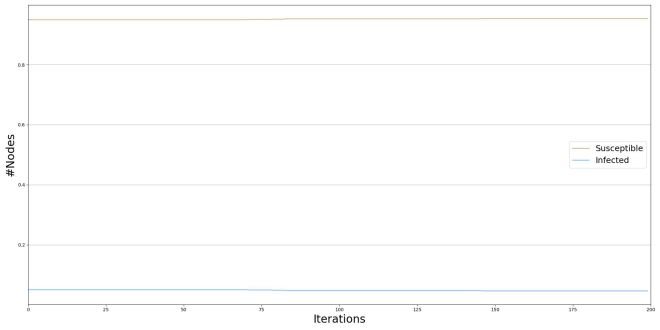

MajorityRuleModel


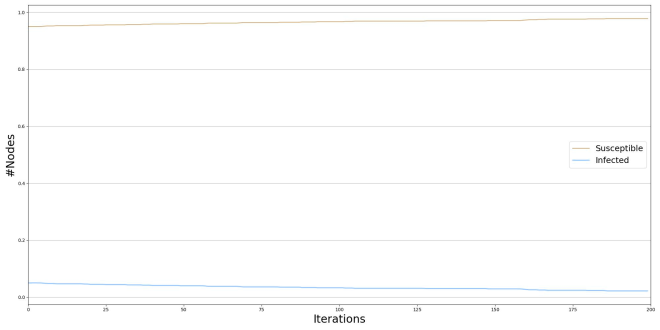

Sznajd


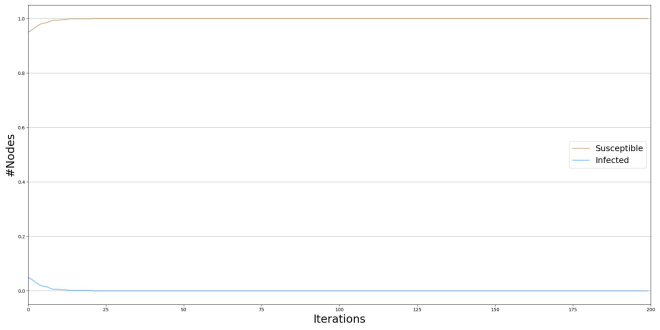

In [178]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)

# **Exercise 3**

Graph configuration

In [179]:
g = nx.read_edgelist("drive/MyDrive/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [180]:
g

Models

In [181]:
models = {
    'Voter': op.VoterModel(g),
    'QVoter': op.QVoterModel(g),
    'MajorityRule': op.MajorityRuleModel(g),
    'Sznajd': op.SznajdModel(g)
}

Set parameters

In [182]:
parameters = {
    'Voter': {'percentage_infected': 0.1},
    'QVoter': {'percentage_infected': 0.1, 'q': 3},
    'MajorityRule': {'percentage_infected': 0.1, 'q': 3},
    'Sznajd': {'percentage_infected': 0.1}
}

Simulations

In [183]:
for model_name, model_instance in models.items():
    print(f"Model: {model_name}")
    config = mc.Configuration()
    for param, value in parameters[model_name].items():
        config.add_model_parameter(param, value)
    model_instance.set_initial_status(config)
    iterations = model_instance.iteration_bunch(200)
    trends = model_instance.build_trends(iterations)

Model: Voter
Model: QVoter
Model: MajorityRule
Model: Sznajd


Visualization

In [184]:
image_names=[]
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
for model_name, model_instance in models.items():
    image_name = f"facebook_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model_instance, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

Voter


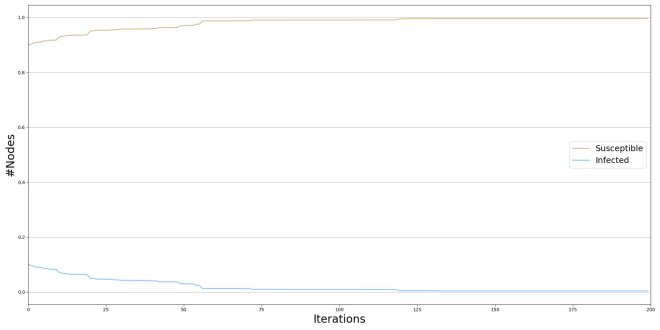

QVoter


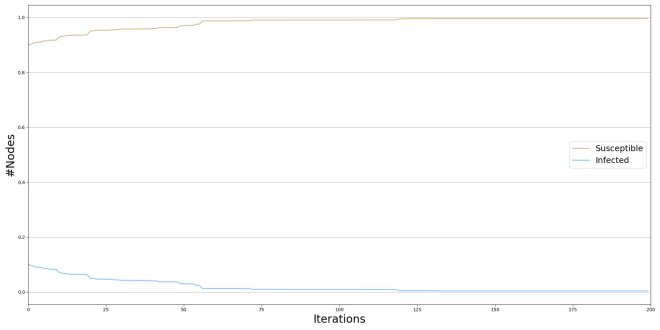

MajorityRule


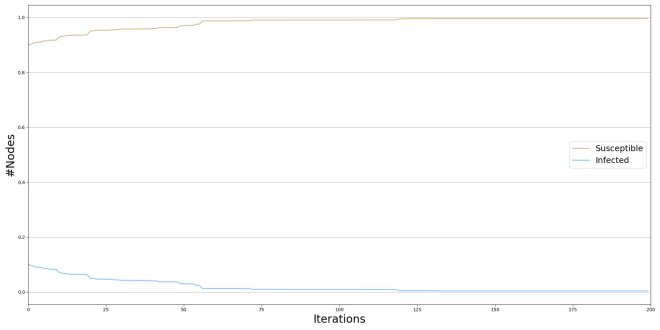

Sznajd


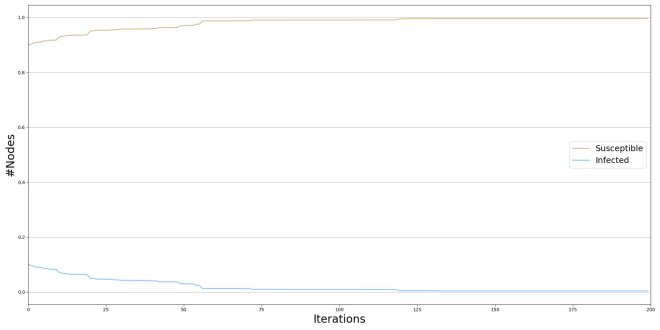

In [185]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)